**XGBoost Regresyon**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("./dataset01.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df["Salary"]
X_ = df.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

**Model & Tahmin İşlemleri**

In [4]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.6 MB/s eta 0:00:00a 0:00:01


In [5]:
import xgboost

In [6]:
from xgboost import XGBRegressor

In [7]:
xgb = XGBRegressor().fit(X_train,y_train)

In [8]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [9]:
y_pred = xgb.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

**Model Tuning**

In [11]:
?xgb

Type:        XGBRegressor
String form:
XGBRegressor(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None,  <...> rs=100, n_jobs=None, num_parallel_tree=None,
           predictor=None, random_state=None, ...)
File:        ~/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosti

In [12]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
            "max_depth": [2,3,4,5,8],
            "n_estimators": [100,200,500,1000],
            "colsample_bytree": [0.4,0.7, 1]}

In [13]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, lea

In [15]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 2,
 'n_estimators': 100}

[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=1000; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0

In [20]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.5, max_depth = 2, n_estimators = 100).fit(X_train, y_train)

In [21]:
y_pred = xgb_tuned.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

360.59070633390274

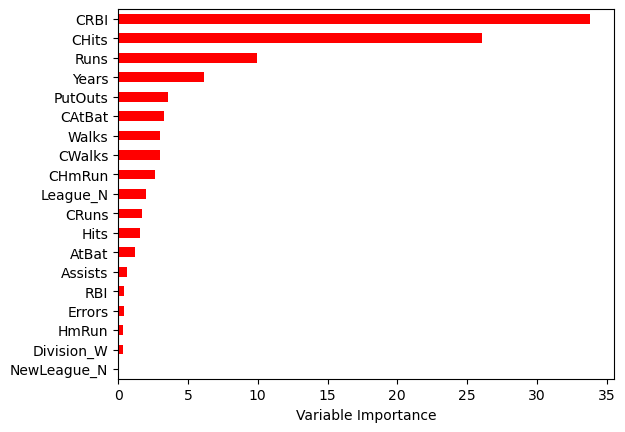

In [24]:
Importance = pd.DataFrame({'Importance': xgb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None